In [123]:
import matplotlib.pyplot as plt
import pickle
import pygame
from game.Constants import w, h
from game.MainGame import MainGame
from pygame.surfarray import array3d
import cv2

In [186]:
adu = pickle.load(open("backup/replay_memory.pth","rb"))

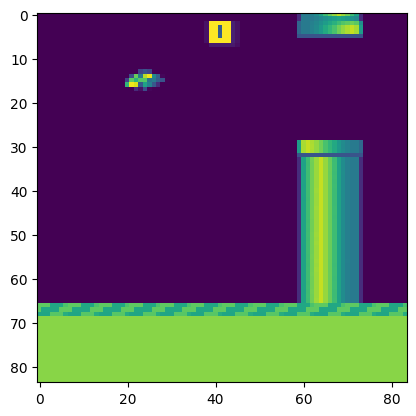

In [277]:
from random import randint

state, action, reward, next_state, done = adu[randint(0,len(adu)-1)]
plt.imshow(next_state[0][[3],:,:].permute(1,2,0))

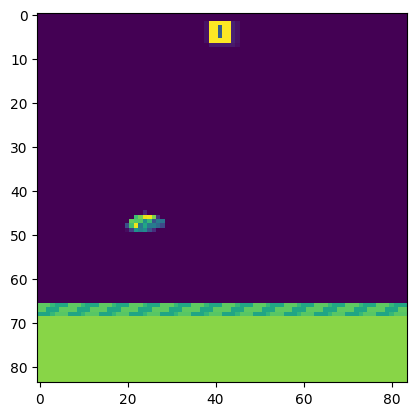

In [141]:
plt.imshow(next_state[0][[0],:,:].permute(1,2,0))

In [2]:
pygame.init()

screen = pygame.display.set_mode((w, h))

In [3]:
main_game = MainGame(screen)


1 False


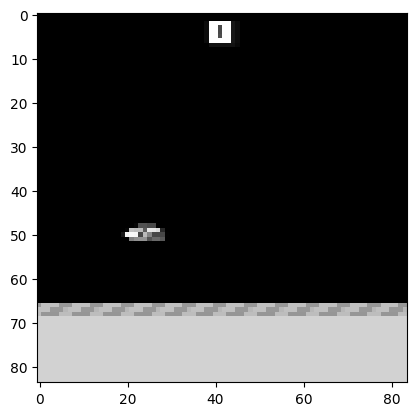

In [272]:
state, reward, done = main_game.update(0)
plt.imshow(state.permute(1,2,0),cmap="gray")
print(reward,done)

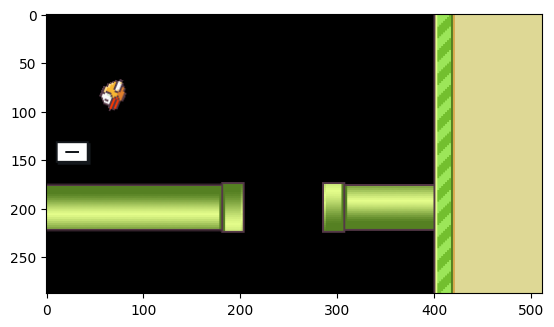

In [354]:
plt.imshow(array3d(pygame.display.get_surface()))

In [358]:
img = array3d(pygame.display.get_surface())
im = cv2.cvtColor(cv2.resize(img, (84, 84)), cv2.COLOR_RGB2GRAY)
_, im2 = cv2.threshold(im, 1, 255, cv2.THRESH_BINARY)

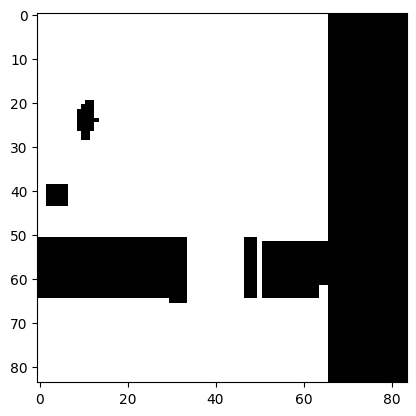

In [359]:
plt.imshow(cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 201, 5),cmap="gray")

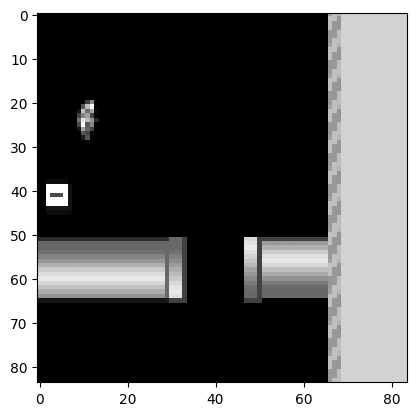

In [360]:
plt.imshow(cv2.cvtColor(cv2.resize(img, (84, 84)), cv2.COLOR_RGB2GRAY),cmap="gray")